## <font color=green>Day-11</font>

- Our topic of discussion is <font color=green size="4">**Clustering**</font>
- Dataset That we would be using : segmented_customers.csv
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Clustering/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/data?select=segmented_customers.csv#:~:text=calendar_view_week-,segmented_customers,-.csv

- Contents :
    1. **Learning Contents about K-means Clustering**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. EDA
    5. Data Preparation
    6. Modelling
    7. Visualization
    8. Conclusion


### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning

Clustering Quick Intro:
- Unsupervised learning method. 
- Used to find meaningful structure, explanatory underlying processes, generative features, and groupings inherent in the data. 

- It is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. 
- It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

Clustering Types:
- K-means Clustering
- Hierarchial Clustering
- Density-based Clustering

Clustering Applications
- Can be used for Segmentation
- Unsupervised classfiication also can be done

K-means Clustering
- 1. Choose Number of Clusters to be made (K) which accts like the current centroids of data
- 2. Calculate Distance of every point from the K centroids chosen, and assign every data point to a nearest cluster
- 3. Calculate Total Error and store
- 4. K-meas Algorithm now computes same procedure but with centroids randomly sleected again.

Learning Resources
- [Youtube](https://youtu.be/4b5d3muPQmA)
- [Blog](

### 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics
import scipy.stats as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders and Scalars
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Cross Validation Libraries
from sklearn.model_selection import cross_val_score


/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Importing Data

In [2]:
# Importing Data
df = pd.read_csv("./Dataset/Clustering/segmented_customers.csv")
print("The shape of the dataset is {0} rows and {1} cols".format(df.shape[0],df.shape[1]))
print(list(df.columns))
df.head(5)

The shape of the dataset is 200 rows and 6 cols
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'cluster']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### <font color=green>Inferences</font>
- We have 200 rows and 6 features
- The presence of cluster is to test the accuracy of the grouping

### 3. Data Exploration

In [3]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   cluster                 200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [5]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
cluster                     6
dtype: int64

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

Note :  CustomerID information is a unique id given to each customer
        It doesnt help in clustering the data as its different for every data point
 
- We would be dropping that field

In [7]:
Y = df["cluster"]
df.drop(["CustomerID","cluster"],axis=1,inplace=True)

### <font color=green>Inferences</font>
- Dataset is clean, we can proceed for further Steps
- After dropping CustomerID we now have
    - 200 rows and 5 features

### 4. EDA

<AxesSubplot:>

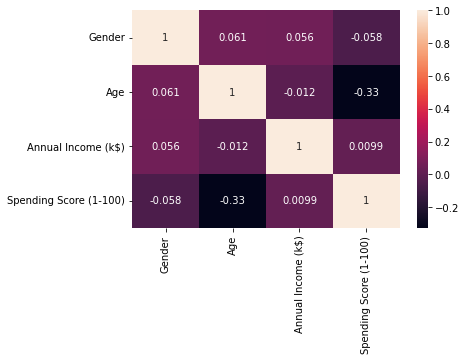

In [8]:
sns.heatmap(df.corr(),annot=True)

### <font color=green>Inferences</font>
- From the HeatMap we can see that theres no correlation among fields

In [9]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### <font color=green>Inferences</font>
- There are few outliers which need to be handled as the Clustering Algortihms are pretty Sensitive towards Outliers
- On the Contrary they need to be handled with care as we have a small dataset with 200 data points

(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

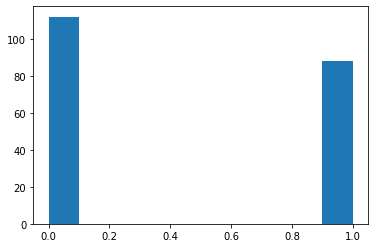

In [10]:
plt.hist(df["Gender"])

/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


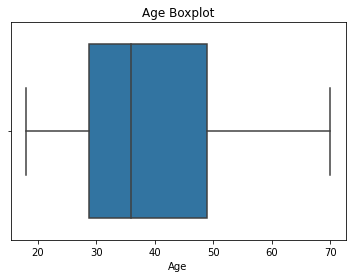

/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


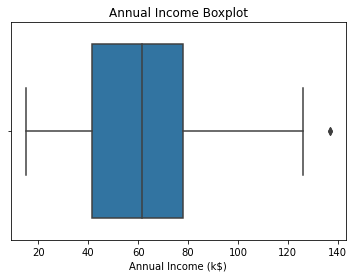

/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


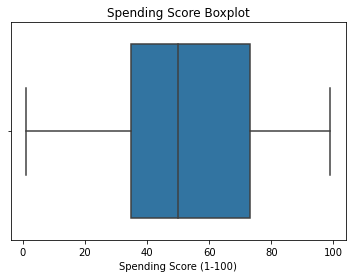

In [11]:
plt.title("Age Boxplot")
sns.boxplot(df["Age"])
plt.show()

plt.title("Annual Income Boxplot")
sns.boxplot(df["Annual Income (k$)"])
plt.show()

plt.title("Spending Score Boxplot")
sns.boxplot(df["Spending Score (1-100)"])
plt.show()

### <font color=green>Inferences</font>
- We can see that there are outliers in the 'Annual Income'
- Apart from that rest all fields is good
- Careful Examination and required operation si to be done on the outliers

In [12]:
df[df["Annual Income (k$)"]>df["Annual Income (k$)"].quantile(0.75)].count()

Gender                    40
Age                       40
Annual Income (k$)        40
Spending Score (1-100)    40
dtype: int64

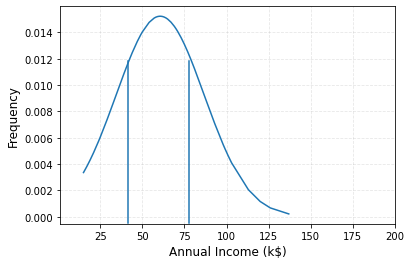

In [13]:
# KDE Plot
df_mean = np.mean(df["Annual Income (k$)"])
df_std = np.std(df["Annual Income (k$)"])
df_25 = np.percentile(df["Annual Income (k$)"],25)
df_75 = np.percentile(df["Annual Income (k$)"],75)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["Annual Income (k$)"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["Annual Income (k$)"].sort_values(), pdf)
plt.xlim([1,200])  
plt.xlabel("Annual Income (k$)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.axvline(df_25,0.75,0.0014)
plt.axvline(df_75,0.75,0.0014,)
plt.show()

### <font color=green>Inferences</font>
- We can see that there are 40 outliers in the 'Annual Income'
- And by seeing the KDE plot also we can confirm that here are significant poritions of data outside the range of 25% percentile to 75 Percentile
- Its wise choosing to not remove the data as they are currently containing proper information which is confimed by viewing the outliers
- We can now proceed to futher steps using this dataset

### 5. Data Preparation

In [14]:
## Scaling of Data is important as K-means Clustering calculates the distances between points for finding the centroids etc
scaler = StandardScaler()

index = df.columns
df_ = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_, columns = index)

X = df_scaled

### 6. Modelling

In [15]:
clusterNum = 6

model = KMeans(n_clusters = clusterNum, n_init = 12)
model.fit(X)

k_means_labels = model.labels_
k_means_cluster_centers = model.cluster_centers_

In [16]:
print(k_means_labels)

[2 2 1 1 1 1 4 1 0 1 0 1 4 1 0 2 1 2 0 1 2 2 4 2 4 2 4 2 4 1 0 1 0 2 4 1 4
 1 4 1 4 2 0 1 4 1 4 1 1 1 4 2 1 0 4 0 4 0 1 0 0 2 4 4 0 2 4 4 2 1 0 4 4 4
 0 2 4 2 1 4 0 2 0 4 1 0 4 1 1 4 4 2 0 4 1 2 4 1 0 2 1 4 0 2 0 1 4 0 0 0 0
 1 4 2 1 1 4 4 4 4 2 4 4 2 1 5 3 2 0 2 3 2 1 5 3 5 3 2 3 5 4 2 1 5 3 2 3 5
 3 2 3 2 3 5 3 5 3 5 3 5 4 5 3 5 3 5 3 5 3 2 3 2 3 2 3 5 3 2 3 2 3 5 3 5 3
 5 3 2 3 5 3 5 3 5 3 5 3 5 3 5]


In [17]:
X["Clus_km"] = k_means_labels
X.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1.128152,-1.424569,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,1
4,-0.886405,-0.563369,-1.662660,-0.395980,1


In [18]:
X.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,1.128152,1.376990,-0.493545,-0.440553
1,-0.886405,-0.926081,-0.700172,0.281824
2,1.128152,-0.740025,-0.162308,0.734822
3,0.309738,0.098231,1.103430,-1.276744
4,-0.886405,0.843959,-0.416103,-0.390299
5,-0.634586,-0.491602,1.138022,1.236143


### 7. Visualizations

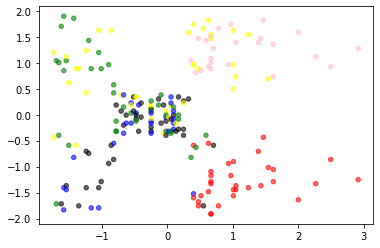

In [19]:
colors = ['blue','green','yellow','red', 'black','pink' ]
X['c'] = X["Clus_km"].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=X.c, alpha = 0.6, s=20)

/var/folders/n6/_d51nz9150383_pg0dg8mxqm0000gn/T/ipykernel_78706/2874495438.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/n6/_d51nz9150383_pg0dg8mxqm0000gn/T/ipykernel_78706/2874495438.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X["Annual Income (k$)"],X["Gende

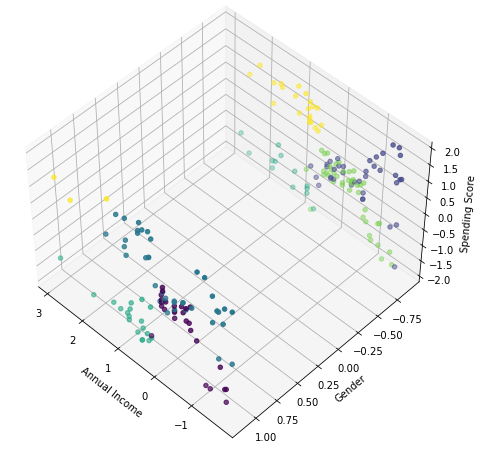

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Gender')
ax.set_zlabel('Spending Score')

ax.scatter(X["Annual Income (k$)"],X["Gender"], X["Spending Score (1-100)"], c= k_means_labels.astype(np.float))


### 8. Conclusion

- K-means clustering, which is an Unsupervised Cluster has been used and demonstarated on segmented_customers dataset
- 3D plot visualization has been Explored
<img src="./Data/thank.jpg"/>